# Julia 基礎圖表繪製：圖表結合敘述統計

## 作業 024：繪製帶統計資訊的圖表

繪製 iris 資料的散佈圖，x 軸為 PetalLength，y 軸為 PetalWidth，並依不同花的種類分別算出 PetalLength 及 PetalWidth 的平均值，將平均值以鉛直線與水平線標在圖上。（請完成以下程式碼）

In [2]:
using StatsBase, RDatasets
using Gadfly

In [3]:
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


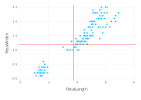

In [4]:
p = plot(iris, x="PetalLength", xintercept=[mean(iris[!, :PetalLength])], Geom.vline(color=["red"]),
         y="PetalWidth", yintercept=[mean(iris[!, :PetalWidth])], Geom.hline(color=["red"]),
         Geom.point)

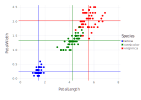

In [6]:
plot(
    iris,x = :PetalLength,y = :PetalWidth,color = :Species,Geom.point,
    Scale.color_discrete_manual(colorant"blue", colorant"green", colorant"red"),
    xintercept = by(iris, :Species, PetalLength_Mean = :PetalLength => mean).PetalLength_Mean,
    Geom.vline(color = ["blue", "green", "red"]),
    yintercept = by(iris, :Species, PetalWidth_Mean = :PetalWidth => mean).PetalWidth_Mean,
    Geom.hline(color = ["blue", "green", "red"]),
    Theme(highlight_width = 0mm)
)